# Stockdata API

In [13]:
import requests
from dotenv import load_dotenv
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import os

load_dotenv()
api_key = os.getenv("ALPHA_API_KEY")
symbol = "AAPL"

#print(api_key)

url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&outputsize=full&apikey={api_key}"
data = requests.get(url).json()


Python-dotenv could not parse statement starting at line 1


In [24]:
url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&outputsize=full&apikey={api_key}"

data = requests.get(url).json() #From this we can change it to a json format
data

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'IBM',
  '3. Last Refreshed': '2021-11-01',
  '4. Output Size': 'Full size',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2021-11-01': {'1. open': '125.0500',
   '2. high': '126.3100',
   '3. low': '123.8375',
   '4. close': '126.2800',
   '5. volume': '5874767'},
  '2021-10-29': {'1. open': '125.4300',
   '2. high': '126.3200',
   '3. low': '124.9100',
   '4. close': '125.1000',
   '5. volume': '5916789'},
  '2021-10-28': {'1. open': '125.1700',
   '2. high': '126.3100',
   '3. low': '124.6200',
   '4. close': '125.8400',
   '5. volume': '6503003'},
  '2021-10-27': {'1. open': '127.4400',
   '2. high': '127.8800',
   '3. low': '125.0100',
   '4. close': '125.1700',
   '5. volume': '6973432'},
  '2021-10-26': {'1. open': '127.5200',
   '2. high': '128.3000',
   '3. low': '126.7550',
   '4. close': '127.1300',
   '5. volume': '8520872'},
  '2021-10-25': {'1. open': '127.530

In [25]:

df = pd.DataFrame(data["Time Series (Daily)"]).transpose().astype(float)
df.head()

,1. open,2. high,3. low,4. close,5. volume
2021-11-01,125.05,126.31,123.8375,126.28,5874767.0
2021-10-29,125.43,126.32,124.9100,125.10,5916789.0
2021-10-28,125.17,126.31,124.6200,125.84,6503003.0
2021-10-27,127.44,127.88,125.0100,125.17,6973432.0
2021-10-26,127.52,128.30,126.7550,127.13,8520872.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5537 entries, 2021-11-01 to 1999-11-01
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    5537 non-null   float64
 1   2. high    5537 non-null   float64
 2   3. low     5537 non-null   float64
 3   4. close   5537 non-null   float64
 4   5. volume  5537 non-null   float64
dtypes: float64(5)
memory usage: 259.5+ KB


In [27]:
df.index

Index(['2021-11-01', '2021-10-29', '2021-10-28', '2021-10-27', '2021-10-26',
       '2021-10-25', '2021-10-22', '2021-10-21', '2021-10-20', '2021-10-19',
       ...
       '1999-11-12', '1999-11-11', '1999-11-10', '1999-11-09', '1999-11-08',
       '1999-11-05', '1999-11-04', '1999-11-03', '1999-11-02', '1999-11-01'],
      dtype='object', length=5537)

In [28]:
df.index = pd.to_datetime(df.index)
print(df.index.dtype)
df.head()


datetime64[ns]


,1. open,2. high,3. low,4. close,5. volume
2021-11-01,125.05,126.31,123.8375,126.28,5874767.0
2021-10-29,125.43,126.32,124.9100,125.10,5916789.0
2021-10-28,125.17,126.31,124.6200,125.84,6503003.0
2021-10-27,127.44,127.88,125.0100,125.17,6973432.0
2021-10-26,127.52,128.30,126.7550,127.13,8520872.0


In [29]:
df.loc["2021"]

,1. open,2. high,3. low,4. close,5. volume
2021-11-01,125.05,126.3100,123.8375,126.28,5874767.0
2021-10-29,125.43,126.3200,124.9100,125.10,5916789.0
2021-10-28,125.17,126.3100,124.6200,125.84,6503003.0
2021-10-27,127.44,127.8800,125.0100,125.17,6973432.0
2021-10-26,127.52,128.3000,126.7550,127.13,8520872.0
...,...,...,...,...,...
2021-01-08,128.57,129.3200,126.9800,128.53,4676487.0
2021-01-07,130.04,130.4600,128.2600,128.99,4507382.0
2021-01-06,126.90,131.8800,126.7200,129.29,7956740.0
2021-01-05,125.01,126.6800,124.6100,126.14,6114619.0


In [30]:
df.loc["2021-10-20":"2021-10-29"]

,1. open,2. high,3. low,4. close,5. volume
2021-10-29,125.43,126.32,124.910,125.10,5916789.0
2021-10-28,125.17,126.31,124.620,125.84,6503003.0
2021-10-27,127.44,127.88,125.010,125.17,6973432.0
2021-10-26,127.52,128.30,126.755,127.13,8520872.0
2021-10-25,127.53,128.65,126.940,127.64,6374038.0
2021-10-22,128.05,130.25,126.611,127.88,11582195.0
2021-10-21,133.51,133.72,128.100,128.33,31466529.0


In [31]:
import time
symbols = ["AAPL", "TSLA", "NVDA", "IBM"]
stock_list = []

for symbol in symbols: #Use symbol to change the url and download different dataframes
    url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&outputsize=full&apikey={api_key}"
    data = requests.get(url).json() 
    df = pd.DataFrame(data["Time Series (Daily)"]).transpose()
    df = df["4. close"].rename(symbol).astype(float) #Rename it to the symbol
    stock_list.append(df)
    time.sleep(10) #To not overload the API

In [32]:
stocks = pd.DataFrame(stock_list).transpose() #Transpose changes it to long format

In [33]:
stocks.index = pd.to_datetime(stocks.index) #Change the index values to datetime
stocks.index

DatetimeIndex(['2021-11-01', '2021-10-29', '2021-10-28', '2021-10-27',
               '2021-10-26', '2021-10-25', '2021-10-22', '2021-10-21',
               '2021-10-20', '2021-10-19',
               ...
               '1999-11-12', '1999-11-11', '1999-11-10', '1999-11-09',
               '1999-11-08', '1999-11-05', '1999-11-04', '1999-11-03',
               '1999-11-02', '1999-11-01'],
              dtype='datetime64[ns]', length=5537, freq=None)

In [34]:

stocks.loc["2020"]

,AAPL,TSLA,NVDA,IBM
2020-12-31,132.69,705.67,522.20,125.88
2020-12-30,133.72,694.78,525.83,124.34
2020-12-29,134.87,665.99,517.73,123.80
2020-12-28,136.69,663.69,516.00,124.82
2020-12-24,131.97,661.77,519.75,124.69
...,...,...,...,...
2020-01-08,303.19,492.14,240.38,135.31
2020-01-07,298.39,469.06,239.93,134.19
2020-01-06,299.80,451.54,237.06,134.10
2020-01-03,297.43,443.01,236.07,134.34


In [35]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5537 entries, 2021-11-01 to 1999-11-01
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    5537 non-null   float64
 1   TSLA    2857 non-null   float64
 2   NVDA    5537 non-null   float64
 3   IBM     5537 non-null   float64
dtypes: float64(4)
memory usage: 216.3 KB


(2, 2)
(4,)


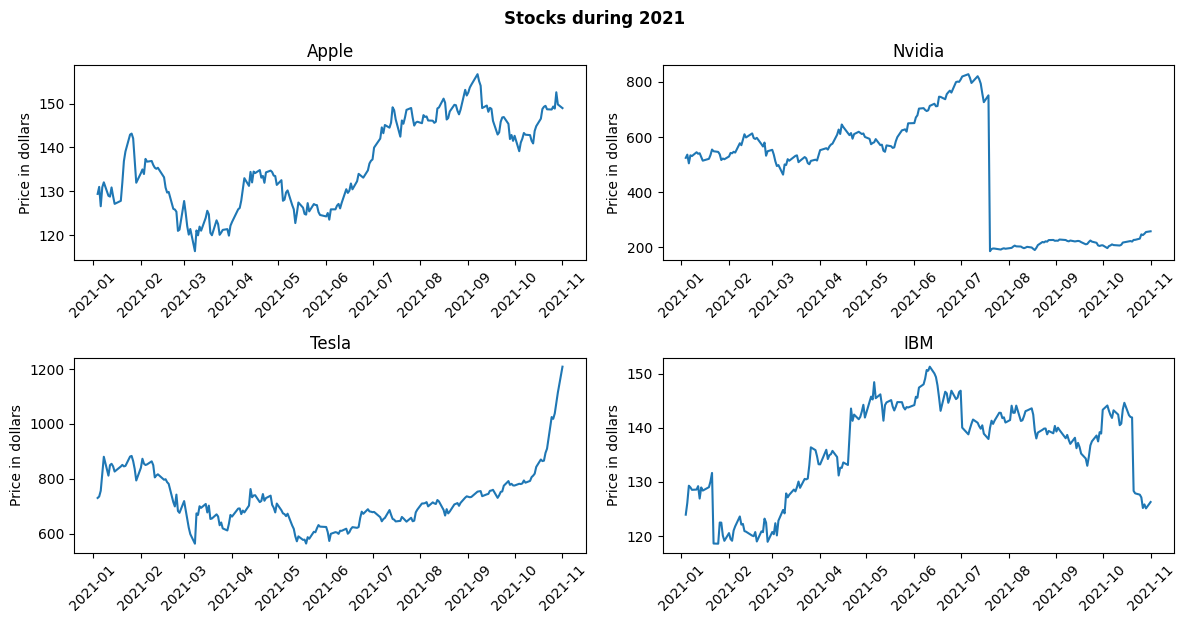

In [36]:
fig, axes = plt.subplots(2,2, dpi=100, figsize=(12, 6))
print(axes.shape) #2,2 array
print(axes.flatten().shape) #The array is no longer 2D it is 4 (which means we can loop through it)

stock_2021 = stocks.loc["2021"]

stock_names = dict(AAPL="Apple", NVDA="Nvidia", TSLA="Tesla", IBM="IBM")
for ax, symbol in zip(axes.flatten(), stock_names): #stock_names gives the keys 
    #print(symbol)
    sns.lineplot(data=stock_2021, x=stock_2021.index, y=symbol, ax=ax) #We set the ax to our ax object
    ax.tick_params(axis="x", rotation=45)
    ax.set(title=f"{stock_names[symbol]}", ylabel="Price in dollars")

fig.tight_layout()
fig.suptitle("Stocks during 2021", y=1.03, fontweight="bold")
plt.savefig("stocks2021.png", facecolor="white")